In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background-color:#BEBFD5;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOAN APPROVAL PREDICTION</p>
In this project, I will be going to develop one such model which can predict whether a person will get his/her loan approved or not ,by using some of the background information of the applicant like the applicant’s gender, marital status, income,education etc.

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#BEBFD5;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>     
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA EXPLORATION](#4)   
    
* [5. DATA PREPROCESSING](#5) 
      
* [6. MODEL BUILDING](#6)
    
* [7. MODEL EXPORT](#7)
    
* [8. CONCLUSION](#8)
    
* [9. END](#9)


<p style="background-color:#BEBFD5;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>     
    

In [46]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')


<p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>     

In [47]:
#Loading the dataset
data=pd.read_csv("/kaggle/input/loan-data-set/loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
data.shape

(614, 13)

<p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>     

#### In this section 
* Data Cleaning
* Feature Engineering
* Outlier Removal


In order to get a full grasp of what steps should I be taking to clean the dataset.
Let us have a look at the information in data.

In [49]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### From the above output,we can conclude and note that:
* There are missing values.
* There are some categorical features in our data frame:as there are some features in dtype:object.So we need to        encode them into numerical forms later.

In [50]:
data=data.drop("Loan_ID",axis=1)

In [51]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [52]:
#replacing 3+ to 4
data=data.replace(to_replace="3+",value=4)
data["Dependents"].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [53]:
data['Dependents']=pd.to_numeric(data['Dependents'])

In [54]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**The data has missing values in some of the categorical columns and numerical columns.In Categorical columns,we can fill in missing values with the mode of each column.The mode represents the values that appears most often in the column and is an appropriate choice when dealing with categorical data:**

In [55]:
#Imputing Missing values with mean for continuous variable
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)


#Imputing Missing values with mode for categorical variables
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)


In [56]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.827362,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,1.212833,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


<p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA EXPLORATION</p>     

<Axes: >

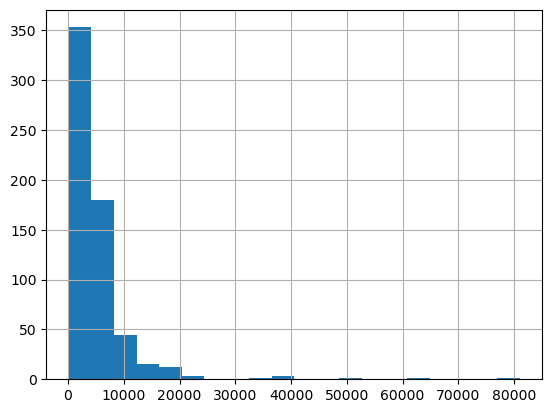

In [58]:
data['ApplicantIncome'].hist(bins=20)

<Axes: >

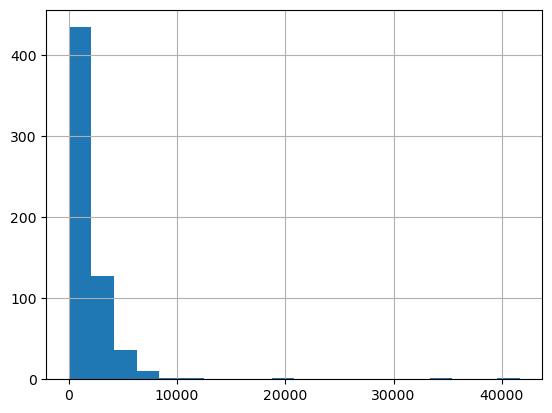

In [59]:
data['CoapplicantIncome'].hist(bins=20)

<Axes: >

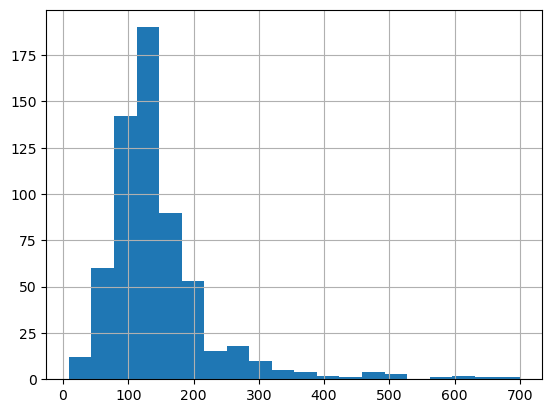

In [60]:
data['LoanAmount'].hist(bins=20)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

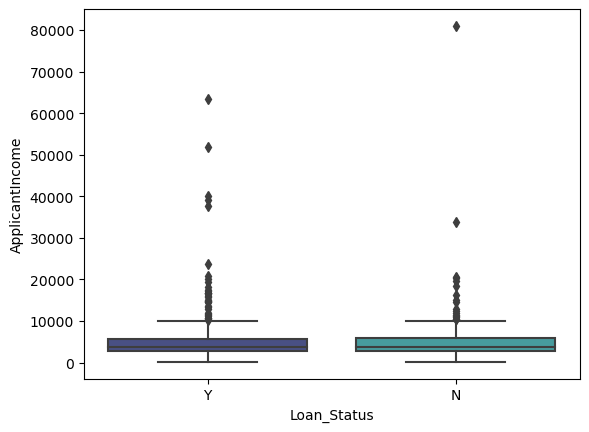

In [61]:
sns.boxplot(data=data,x='Loan_Status',y='ApplicantIncome',palette='mako')

Clearly, the ApplicantIncome column contains outliers which need to be removed before moving further.
Here,I am using Interquartile Range(IQR)
where:
* Q1=First quartile(25th percentile)
* Q3=Third quartile(75th percentile)
 
 The IQR represents the range between the first quartile(25th percentile) and the third quartile(75th percentile)
  of the data.It is less sensitive of outliers than the range and is often used for skewed data.



In [62]:
#Calculate the IQR
Q1=data['ApplicantIncome'].quantile(0.25)
Q3=data['ApplicantIncome'].quantile(0.75)
IQR=Q3-Q1
#Define the lower and upper bounds for outliers
lower_bound=Q1-1.5* IQR
upper_bound=Q3+1.5*IQR
#Remove outliers
data=data[(data['ApplicantIncome']>=lower_bound) & data['ApplicantIncome']<=upper_bound]


<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

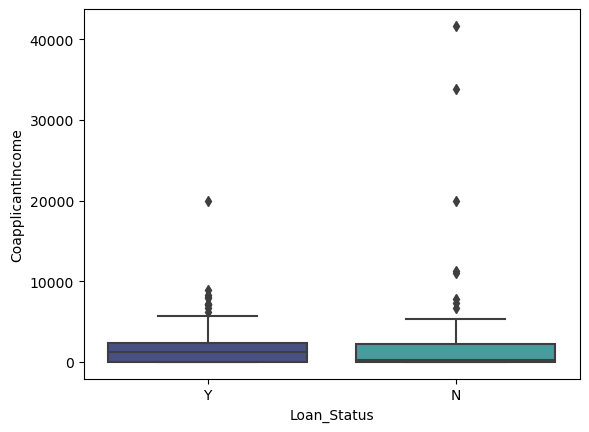

In [63]:
sns.boxplot(data=data,x='Loan_Status',y='CoapplicantIncome',palette='mako')

The income of the loan co-applicant also contains outliers

In [64]:
#Calculate the IQR
Q1=data['CoapplicantIncome'].quantile(0.25)
Q3=data['CoapplicantIncome'].quantile(0.75)
IQR=Q3-Q1
#Define the lower and upper bounds for outliers
lower_bound=Q1-1.5* IQR
upper_bound=Q3+1.5*IQR
#Remove outliers
data=data[(data['CoapplicantIncome']>=lower_bound) & data['CoapplicantIncome']<=upper_bound]


In [65]:
#adding a new feature 
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
data=data.drop(['ApplicantIncome','CoapplicantIncome'],axis='columns')
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0.0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='Education', ylabel='count'>

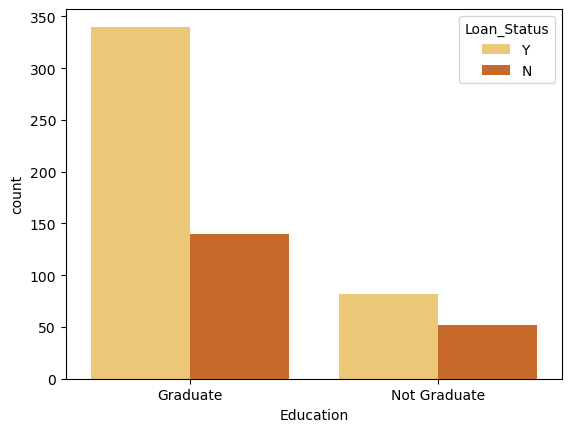

In [66]:

sns.countplot(x='Education',hue='Loan_Status',data=data,palette='YlOrBr')

<Axes: xlabel='Married', ylabel='count'>

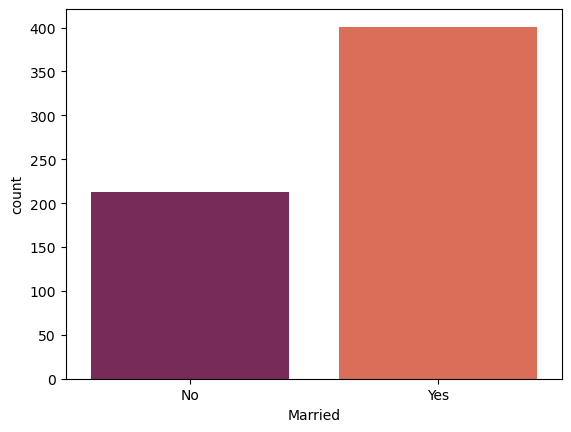

In [67]:
sns.countplot(x='Married',data=data,palette='rocket')

<Axes: xlabel='Gender', ylabel='count'>

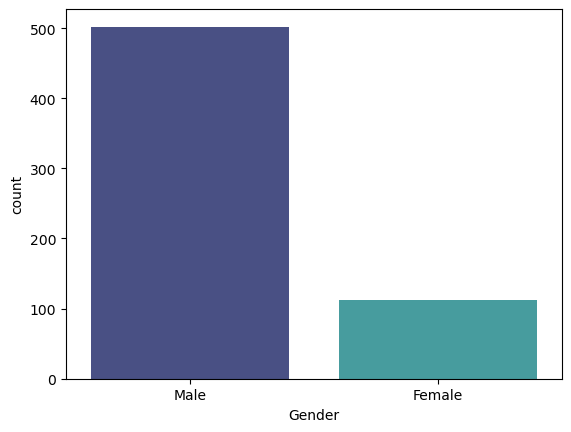

In [68]:
sns.countplot(x='Gender',data=data,palette='mako')

As,we can see most of people who come for a loan is a male and got married

<p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>  


In this section, I will be preprocessing the data to perform clustering operations.
### The following steps are applied to preprocess the data:
* Label Encoding the categorical features
* Scaling the feature using the standard scaler

In [69]:
#Get list of categorical variables
s=(data.dtypes=='object')
object_cols=list(s[s].index)
print("Categorical variables in the dataset:",object_cols)

Categorical variables in the dataset: ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [70]:
#Label Encoding the object dtypes:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
print("All Features are now numerical")



All Features are now numerical


In [71]:
#Scaling
scaler=StandardScaler()
scaler.fit(data)
scaled_ds=pd.DataFrame(scaler.transform(data),columns=data.columns)
print("All features are now scaled")

All features are now scaled


In [72]:
scaled_ds.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0.472343,-1.372089,-0.682729,-0.528362,-0.392601,0.000000,0.273231,0.411733,1.223298,0.674519,-0.182184
1,0.472343,0.728816,0.142459,-0.528362,-0.392601,-0.219273,0.273231,0.411733,-1.318513,-1.482537,-0.144684
2,0.472343,0.728816,-0.682729,-0.528362,2.547117,-0.957641,0.273231,0.411733,1.223298,0.674519,-0.623656
3,0.472343,0.728816,-0.682729,1.892641,-0.392601,-0.314547,0.273231,0.411733,1.223298,0.674519,-0.322885
4,0.472343,-1.372089,-0.682729,-0.528362,-0.392601,-0.064454,0.273231,0.411733,1.223298,0.674519,-0.158785


<p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODEL BUILDING</p>     

#### Steps involved in the Model Building
    
* Setting up features and target as X and Y
* Splitting the testing and training sets
*  Build a pipeline of model for five different classifiers
        1.Logistic Regression
        2.RandomForestClassifier
        3.KNeighborsClassifier
        4.Support Vector Machines
        5.Naive Bayes
* Fit all the models on training data
* Get the cross-validation on the training set for all models for accuracy
 

In [73]:
#Setting values for labels and feature as X and y
X = data.drop('Loan_Status',axis = 1)
y = data['Loan_Status']
#Splitting the testing and training sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [74]:
#Testing on the following classifiers
Classifiers=[LogisticRegression(),
            RandomForestClassifier(),
            SVC(),
            KNeighborsClassifier(),
            MultinomialNB()]
for model in Classifiers:
    model.fit(X_train,y_train)
#Dictionary of pipelines and model types for ease of reference
pipe_dict={0: "LogisticRegression", 1: "RandomForest", 2:"SVC", 3:"KNeighbors", 4:"NaiveBayes"}

In [77]:
# Crossvalidation 
for i, model in enumerate(Classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=5)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LogisticRegression: 0.828656 
RandomForest: 0.798852 
SVC: 0.698371 
KNeighbors: 0.657497 
NaiveBayes: 0.554609 


<p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODEL EXPORT</p>     

In [78]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [79]:

import joblib
joblib.dump(model,'loan_status_predict')


['loan_status_predict']

In [80]:
model=joblib.load('loan_status_predict')

In [81]:
# print("Loan Approval Prediction: ")
a=float(input("Enter the Gender:   "))
b=float(input("Enter the marriage status: "))
c=float(input("Enter the dependents: "))
d=float(input("Enter the education: "))
e=float(input("Enter the employment status: "))
f=float(input("Enter the LoanAmount: "))
g=float(input("Enter the Loan_Amount_Term: "))
h=float(input("Enter the Credit_History: "))
i=float(input("Enter the Property_Area: "))
j=float(input("Enter the Total_Income: "))
features=np.array([[a,b,c,d,e,f,g,h,i,j]])
print("Predicted Loan Status=",model.predict(features))

Enter the Gender:    1
Enter the marriage status:  1
Enter the dependents:  0.0
Enter the education:  1
Enter the employment status:  0
Enter the LoanAmount:  120
Enter the Loan_Amount_Term:  360.0
Enter the Credit_History:  1.0
Enter the Property_Area:  2
Enter the Total_Income:  3000.0


Predicted Loan Status= [1]


<p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>     

Logistic Regression is giving the best accuracy of 82%.By leveraging historical loan data and applying machine learning algorthms,businesses can build models to determine loan approval for new applicants.

<p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p> 